<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Matrices 

1. **Modelo de población de una especie de pajaros** 
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1) 
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros 
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que: 

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix} 
0 & 2 \\
0.3 & 0.5 
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A






In [ ]:
#@title Librerías
import numpy as np
import matplotlib.pyplot as plt

Parte a

In [ ]:
A = np.array([[0,2],[0.3,0.5]]) #matriz de coeficientes
k = 2
beta = 0.5
alpha = 0.3
def pn(matriz):
  razon = np.zeros(100)
  p0 = np.array([0,10]).T
  for i,j in enumerate(range(1,101)):
    pn = (np.linalg.matrix_power(A,j)@p0).astype(int)
    razon[i] = pn[0]/pn[1]
  return razon
razon = pn(A)

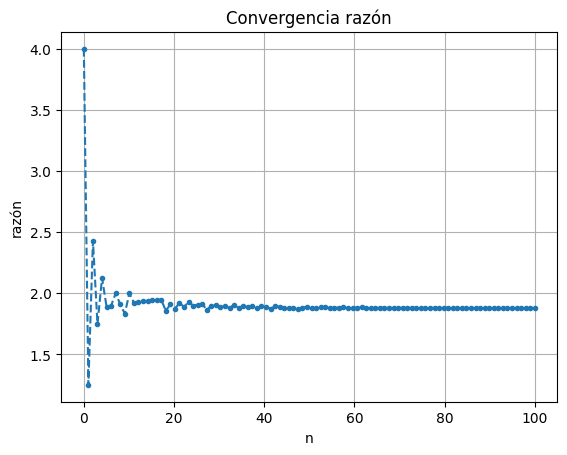

In [ ]:
#Grafiquemos la razón para 100 valores de n y veamos si converge
x = np.linspace(0,100,100)
plt.plot(x,razon,'.--')
plt.xlabel('n')
plt.ylabel('razón')
plt.title('Convergencia razón')
plt.grid()
plt.show()

Parte b

In [ ]:
#Hallemos los valores y vectores propios de A
eing = np.linalg.eig(A)

In [ ]:
#Hallemos los valores y vectores propios de A
eing = np.linalg.eig(A)
valoresP = eing[0]
vectoresP = eing[1].T
vector1 = vectoresP[0]
vector2 = vectoresP[1]

In [ ]:
a = np.array([[vector1[0],vector2[0]],[vector1[1],vector2[1]]])
b = p0
x = np.linalg.solve(a,b)
a1 = x[0]
a2 = x[1]

In [ ]:
print(f'a1 tiene un valor de: {a1}')
print(f'a2 tiene un valor de: {a2}')

a1 tiene un valor de: 12.76497194950322
a2 tiene un valor de: -13.916151217678744


In [ ]:
#Verificamos si los valores sí corresponden
p1 = valoresP[0]*((a1*vector1) +(valoresP[0]/valoresP[1]))*(a2*vector2)R
p1

array([ 88.79563273, -10.81483655])

##2. **Modelo de encriptación** 

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?


In [ ]:
from numpy import matrix
#Primero creemos la matriz de código
C = matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
#Encontramos la inversa de la matriz
In = C.I

#Ahora creamos la matriz del mensaje
M = matrix([[47,49,-19,257,487],
                  [10,-9,63,137,236],
                  [79,142,-184,372,536],
                   [59,70,-40,332,588]])

#Multipliquemos las matrices
mensaje = (M@In)

#Organicemos el mensaje para poder trabajar con él.
mens = mensaje.flatten()
mmm = np.round(mens).astype(int)
#Creemos un string donde buscaremos las letras.
abc = 'aabcdefghijklmnopqrstuvwxyz '
texto = ''
#Recorremos el mensaje y entregamos el código en el índice de 
for i in range(20):
  pos = int(mmm[0,i])
  texto += abc[pos]
texto

'are you having fun  '

##3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$


3. 

In [ ]:
#@title Librerías.
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
#Creemos la matriz.
A = np.array([[2,-1,1],[0,3,-1],[2,1,3]])
A

array([[ 2, -1,  1],
       [ 0,  3, -1],
       [ 2,  1,  3]])

In [ ]:
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])
autoval, autovec = np.linalg.eig(A)

#Diagonalizemos
D = np.diag(autoval)
U = autovec

In [ ]:
def sistema(tfinal, r0):
    t = np.linspace(0, tfinal, 100) 
    r = np.zeros((len(t), 3))

    # Cálculo de la solución para cada valor de tiempo
    for i, t in enumerate(t):
        termino = np.exp(D*t)  
        r[i] = U @ (termino @ np.linalg.inv(U) @ r0)
    return r

In [ ]:
#Condiciones iniciales
r0 = np.array([1,1,2])
tfin = 2

In [ ]:
solucion = sistema(tfin,r0)
x = solucion[:,0]
y = solucion[:,1]
z = solucion[:,2]

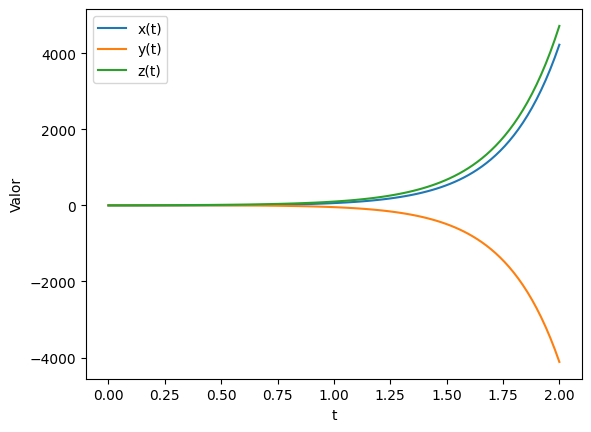

In [ ]:
# Graficar x(t), y(t), z(t)
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.plot(t, z, label='z(t)')
plt.xlabel('t')
plt.ylabel('Valor')
plt.legend()
plt.show()

Realizado con chatgpt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

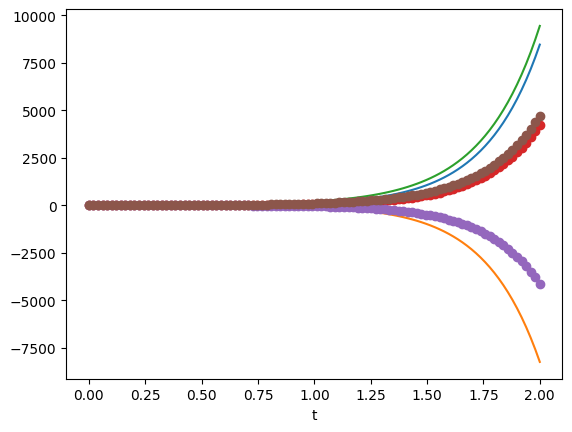

In [ ]:
#Definir la función analítica de x(t), y(t), z(t)
def x_analytical(t, x0, y0, z0):
    return x0 * (np.exp(2*t) * (1 + np.exp(2*t) - 2*t)) + y0 * (-2*t * np.exp(2*t)) + z0 * (np.exp(2*t) * (-1 + np.exp(2*t)))

def y_analytical(t, x0, y0, z0):
    return x0 * (-np.exp(2*t) * (-1 + np.exp(2*t) - 2*t)) + y0 * (2*(t+1) * np.exp(2*t)) + z0 * (-np.exp(2*t) * (-1 + np.exp(2*t)))

def z_analytical(t, x0, y0, z0):
    return x0 * (np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)) + y0 * (2*t * np.exp(2*t)) + z0 * (np.exp(2*t) * (1 + np.exp(2*t)))

# Parámetros iniciales
x0, y0, z0 = 1, 1, 2

# Intervalo de tiempo
t = np.linspace(0, 2, 100)

# Calcular las soluciones analíticas
x_analytical_values = x_analytical(t, x0, y0, z0)
y_analytical_values = y_analytical(t, x0, y0, z0)
z_analytical_values = z_analytical(t, x0, y0, z0)

# Calcular las soluciones numéricas
# (ya se calcularon en el paso b) del código anterior)

# Graficar las soluciones analíticas y numéricas
plt.plot(t, x_analytical_values, label='x_analytical(t)')
plt.plot(t, y_analytical_values, label='y_analytical(t)')
plt.plot(t, z_analytical_values, label='z_analytical(t)')
plt.plot(t, x, 'o', label='x(t) (numerical)')
plt.plot(t, y, 'o', label='y(t) (numerical)')
plt.plot(t, z, 'o', label='z(t) (numerical)')
plt.xlabel('t')
plt
